
<div class="alert alert-info" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>

  <p>
    This lesson is part of the <b>DS Lab core curriculum</b>. For that reason, this notebook can only be used on your WQU virtual machine.
  </p>

  <p>
    This means:
    <ul>
      <li><span style="color: red">ⓧ</span> No downloading this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing of this notebook with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No downloading the embedded videos in this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing embedded videos with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No adding this notebook to public or private repositories.</li>
      <li><span style="color: red">ⓧ</span> No uploading this notebook (or screenshots of it) to other websites, including websites for study resources.</li>
    </ul>

  </p>
</div>


<font size="+3"><strong>Visualizing Data: Matplotlib</strong></font>

There are many ways to interact with data, and one of the most powerful modes of interaction is through **visualizations**. Visualizations show data graphically, and are useful for exploring, analyzing, and presenting datasets. We use four libraries for making visualizations: [pandas](../%40textbook/07-visualization-pandas.ipynb), Matplotlib, [plotly express](../%40textbook/08-visualization-plotly.ipynb), and [seaborn](../%40textbook/09-visualization-seaborn.ipynb). In this section, we'll focus on using Matplotlib.

# Boxplots

A **boxplot** is a graph that shows the minimum, first quartile, median, third quartile, and the maximum values in a dataset. Boxplots are useful, as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

Let's create a boxplot using the `"area_m2"` data from `colombia-real-estate-1`.
Note that the `usecols` argument allow us to only read in the columns we want, in this case `"area_m2"`.

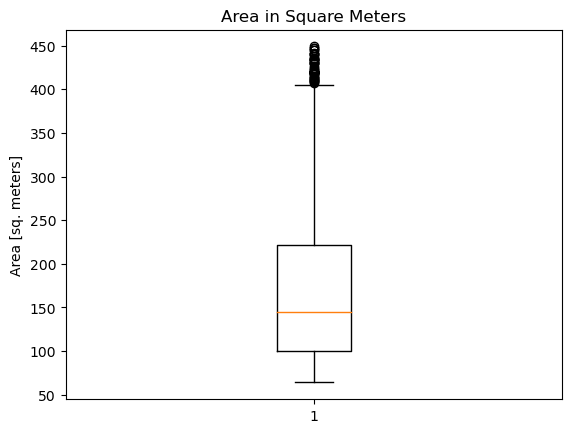

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/colombia-real-estate-1.csv", usecols=["area_m2"])
plt.boxplot(df["area_m2"])
plt.ylabel("Area [sq. meters]")
plt.title("Area in Square Meters");

Here's how to interpret a boxplot. A boxplot always contains a box with two lines above and below it. Those lines are called **whiskers**, and the ends of those lines represent the upper and lower bounds of the dataset. There are also some values above the top whisker, but we'll come back to them a little later. In the meantime, notice that the plot divides the data into four sections: 

- the bottom of the lower whisker to the bottom of the box, 
- the bottom of the box to the line in the middle, 
- the middle line to the top line of the box, and 
- the top of the box to the end of the upper whisker. 

These sections are called **intervals**, and the three lines that divide them are called **quartiles**. Each interval contains 25% of the observations in the dataset, which means that the box created by the first and third quartiles represents the middle 50% of observations. The second quartile — the orange line on our graph — represents the dataset's median value. 

Keeping all that in mind, the boxplot here shows that while there are some very large properties in our Colombia dataset, half the properties tend to be much smaller. Remember those data points above the top whisker? Those are called **outliers**, and they represent values so extreme that they fall outside the meaningful spread of observations in the dataset. Since half of our properties are small — one-bedroom apartments, say — we don't really need to pay attention to eighty-room mansions nestled in the middle of thousand-acre estates. Not for this project anyway. Part of the purpose of making a boxplot is to find those outliers and discard them from future analyses.

<font size="+1">Practice</font>

Try it yourself! Create a boxplot using the `price_cop` data from `colombia-real-estate-2`.

In [ ]:
df2 = ...



# Histograms

A **histogram** is a graph that shows the frequency distribution of numerical data. In addition to helping us understand frequency, histograms are also useful for detecting outliers.

Let's create a histogram using the `"area_m2"` data from `colombia-real-estate-1`.

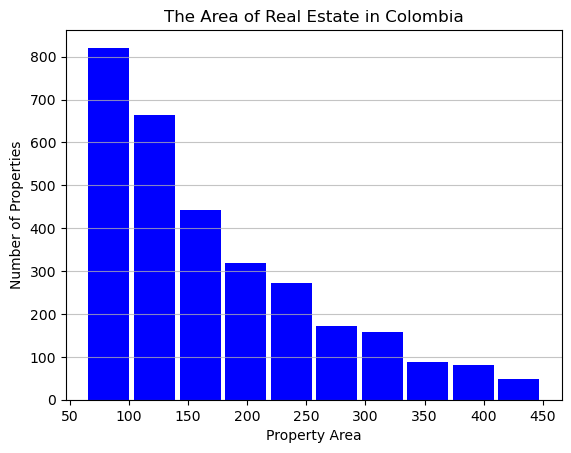

In [3]:
df = pd.read_csv("data/colombia-real-estate-1.csv", usecols=["area_m2"])
plt.hist(df, bins=10, rwidth=0.9, color="b")
plt.title("The Area of Real Estate in Colombia")
plt.xlabel("Property Area")
plt.ylabel("Number of Properties")
plt.grid(axis="y", alpha=0.75);

There are two things to consider in this histogram. First and foremost is its interpretation: the distribution is skewed significantly to the left. In this case, the data suggest that the majority of properties in Colombia are smaller than 150 square meters.

You might also have noticed that there are ten bars. In a histogram, we call these bars **bins**. A bin is simply a way to group data to make it easier to see trends. You can use as many or as few as you like; just recognize that the fewer bins you use, the less detailed the output will become. 
             
Let's take a look at what the same data looks like when it's in 20 bins instead of 10.

In [ ]:
df = pd.read_csv("data/colombia-real-estate-1.csv", usecols=["area_m2"])
# Notice that we changed `bins` from 10 to 20
plt.hist(df, bins=20, rwidth=0.9, color="b")
plt.title("The Area of Real Estate in Colombia")
plt.xlabel("Property Area")
plt.ylabel("Number of Properties")
plt.grid(axis="y", alpha=0.75);

The line isn't quite as smooth as it was before. Depending on the story you want your histogram to tell, it might be more important for a trend to be smooth, or it might be more important to show smaller levels of variation. Here, we can still see that the properties in Colombia tend to be small, but the size of the properties are not evenly distributed. This histogram doesn't tell us anything about *why* this might be true, but it does suggest that there might be something more interesting going on in the background.

<font size="+1">Practice</font>

Try it yourself! Create two histograms using the `price_cop` data from Colombia Real Estate 2: one with five bins, and the other with 15 bins.

In [ ]:
df2 = ...

plt.title("The Area of Real Estate in Colombia")
plt.xlabel("Property Area")
plt.ylabel("Number of Properties")
plt.grid(axis="y", alpha=0.75)

In [ ]:

plt.title("The Area of Real Estate in Colombia")
plt.xlabel("Propert Area")
plt.ylabel("Number of Properties")
plt.grid(axis="y", alpha=0.75)

# Bar Charts

A **bar chart** is a graph that shows all the values of a categorical variable in a dataset. They consist of an axis and a series of labeled horizontal or vertical bars. The bars depict frequencies of different values of a variable or simply the different values themselves. The numbers on the y-axis of a vertical bar chart or the x-axis of a horizontal bar chart are called the scale.

Let's make a bar chart showing the number of properties in each borough, using the `mexico-city-real-estate-1` dataset. First, let's pull out the values in the `borough` variable.

In [ ]:
mexico_city1 = pd.read_csv("./data/mexico-city-real-estate-1.csv")

new_columns = ["empty1", "country", "city", "borough", "empty2"]
mexico_city1[new_columns] = mexico_city1["place_with_parent_names"].str.split(
    "|", 4, expand=True
)
mexico_city1 = mexico_city1.drop(["empty1", "empty2"], axis=1)

by_borough = mexico_city1["borough"].value_counts()
by_borough

Now, let's make a bar chart of the Series.

In [ ]:
plt.bar(x=by_borough.index, height=by_borough.values)
plt.ylabel("Number of Properties")
plt.xticks(rotation=90);

<font size="+1">Practice</font> 

Try it yourself! Make a bar chart by property types in the `mexico-city-real-estate-1.csv` dataset.

In [ ]:
by_property_type = ...

plt.ylabel("Number of Properties")
plt.xticks(rotation=90);

# Scatter Plots
A **scatter plot** is a graph that uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables, and are especially useful if you're looking for **correlations**.

Let's create a simple scatter plot using the `"area_m2"` data from `colombia-real-estate-3`. Note that we use the `usecols` argument below to import only two columns from the CSV file.

In [ ]:
df1 = pd.read_csv("data/colombia-real-estate-3.csv", usecols=["area_m2", "price_usd"])
plt.scatter(df1["area_m2"], df1["price_usd"], color="r")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");

This scatter plot is showing us what we might already have suspected: there are lots of cheap, small properties, and as the size of the property goes up, so does the price. 

<font size="+1">Practice</font>

Try it yourself! Create a scatter plot using the `area_m2` and `price_cop` columns in the `colombia-real-estate-2` dataset. Try changing the `color` argument to `"b"`, `"g"`, or `"y"`, and see what happens!

In [ ]:
df2 = pd.read_csv(
    "data/colombia-real-estate-2.csv", usecols=["area_m2", "price_cop"]
)  # REMOVERHS

plt.xlabel("Property Area")
plt.ylabel("Price in Colombian Pesos")
plt.title("Property Area vs Price in Colombian Pesos");

You may have noticed that there are lots of data points here, which makes it difficult to see if there's really a trend going on. This issue is called **over-plotting**, and it's very common in large datasets.

One solution to over-plotting is to use the `df.sample` method to select a random sample from the dataset. In the example below, note that the `frac=0.50` indicates that the random sample will consist of 50% of the data points in the set.

In [ ]:
df3 = pd.read_csv("data/colombia-real-estate-3.csv", usecols=["area_m2", "price_usd"])
df4 = df3.sample(frac=0.50, replace=True, random_state=1)
plt.scatter(df4["area_m2"], df4["price_usd"], color="r")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");

That looks better, but things are still a little muddled. Let's try for a random sample that only looks at 25% of the data.

In [ ]:
df4 = df3.sample(frac=0.25, replace=True, random_state=1)
plt.scatter(df4["area_m2"], df4["price_usd"], color="r")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");

Perfect! With a smaller sample, it's much easier to see what's going on. 

<font size="+1">Practice</font>

Try it yourself! Using a random sample of 25% of the `area_m2` and `price_cop` data from the `colombia-rea-estate-3` data, create a green scatter plot.

In [ ]:
df3 = pd.read_csv("data/colombia-real-estate-3.csv", usecols=["area_m2", "price_usd"])
df4 = ...


With the data as broadly scattered as this, it's unlikely that the two variables share a strong positive correlation, but let's calculate the **correlation coefficient,** just to be sure. 

To do that, we'll go back to the full dataset, and use the `corr` method. The code looks like this:

In [ ]:
df = pd.read_csv("data/colombia-real-estate-3.csv", usecols=["area_m2", "price_usd"])
area_m2 = df["area_m2"]
price_usd = df["price_usd"]
correlation = area_m2.corr(price_usd)
print(correlation)

This indicates a moderate positive correlation between `"area_m2"` and `"price_usd"`, which is consistent with the scatter plot we made.

<font size="+1">Practice</font>

Try it yourself! Use the `corr` method to find the correlation coefficient of `"area_m2"` and `"price_cop"` in the `colombia-real-estate-3` dataset.

In [ ]:
import pandas as pd

df = pd.read_csv("data/colombia-real-estate-3.csv", usecols=["area_m2", "price_usd"])
area_m2 = df["area_m2"]
price_usd = df["price_usd"]
correlation = ...
print(correlation)

# Add a vertical or horizontal line across a plot

Vertical lines can be added to an existing plot in Matplotlib using `plt.axvline`. For this example, we'll add a vertical line using the scatter plot created in the previous step:

In [ ]:
plt.scatter(df4["area_m2"], df4["price_usd"], color="r")
plt.axvline(250, linestyle="--", color="blue", label="Line Title")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");

<font size="+1">Practice</font>

Try it yourself! Use the `axvline` function to plot a vertical line at 350 and at 150 on the x-axis using the same scatter plot from the previous example. <span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

In [ ]:
# Remove {
plt.scatter(df4["area_m2"], df4["price_usd"], color="r")
plt.axvline(150, linestyle="--", color="blue", label="Line Title")
plt.axvline(350, linestyle="--", color="blue", label="Line Title")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");
# Remove }

# Sources & Further Reading

- [Example Boxplot from the Matplotlib Documentation](https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)
- [Discussion of How to Interpret a Histogram](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/histo/5214822-eng.htm)
- [Python Documentation on Histograms](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas)
- [Pandas Official DataFrame Bar Plot Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)
- [Online Tutorial on Using Groupby and Count in Pandas](https://www.statology.org/pandas-groupby-count/)
- [Pandas Official Documentation on Splitting a String Entry in a Column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html)
- [Wikipedia Entry on Boroughs of Mexico City](https://en.wikipedia.org/wiki/Boroughs_of_Mexico_City)
- [stackoverflow Entry on Adding Labels and Titles to Pandas Plots](https://stackoverflow.com/questions/63650646/add-labels-and-title-to-a-plot-made-using-pandas#63650741)
- [Further Information on Scatter Plots](https://chartio.com/learn/charts/what-is-a-scatter-plot/)
- [Scatter Plot Tutorial](https://www.tutorialspoint.com/matplotlib/matplotlib_scatter_plot.htm)
- [Subsetting Random Samples in a DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
- [Pandas `corr` Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
